In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import seaborn as sns

In [4]:
data = pd.read_csv('adult_Income_dataset.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
#Label encoding of the dataset
from sklearn.preprocessing import LabelEncoder

#Encoding the for the target variable income
label_encoder = LabelEncoder()
data['income']= label_encoder.fit_transform(data['income'])

#One hot encoding for the remaining categorical features
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.info()
data_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 101 entries, age to native-country_Yugoslavia
dtypes: bool(94), int64(7)
memory usage: 7.0 MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
#Ensure the income column is treated as a binary categorical variable
data['income'] = data['income'].apply(lambda x: 1 if x > 0 else 0)

In [24]:
#Split data into features and target and target
X = data_encoded.drop('income', axis=1)
y = data_encoded['income']

In [26]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [28]:
#Initialize the RandomforetClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [34]:
# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
#Predictions
y_pred = rf_model.predict(X_test)

In [38]:
#Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [40]:
#Print accuracy, confusion matrix, and classification  report
print(f'Accuracy:{accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy:0.5278100047771788
Confusion Matrix:
[[5878  952  461  125]
 [2964  464  240   63]
 [ 725  139 1263  225]
 [ 356   78  591  129]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.79      0.68      7416
           1       0.28      0.12      0.17      3731
           2       0.49      0.54      0.51      2352
           3       0.24      0.11      0.15      1154

    accuracy                           0.53     14653
   macro avg       0.40      0.39      0.38     14653
weighted avg       0.47      0.53      0.48     14653



In [42]:
#Normalize the confusion matrix by the true label counts
conf_matrix_normalized = conf_matrix.astype('float')/conf_matrix.sum(axis=1)[:, np.newaxis]
conf_matrix_normalized = np.round(conf_matrix_normalized, 3)

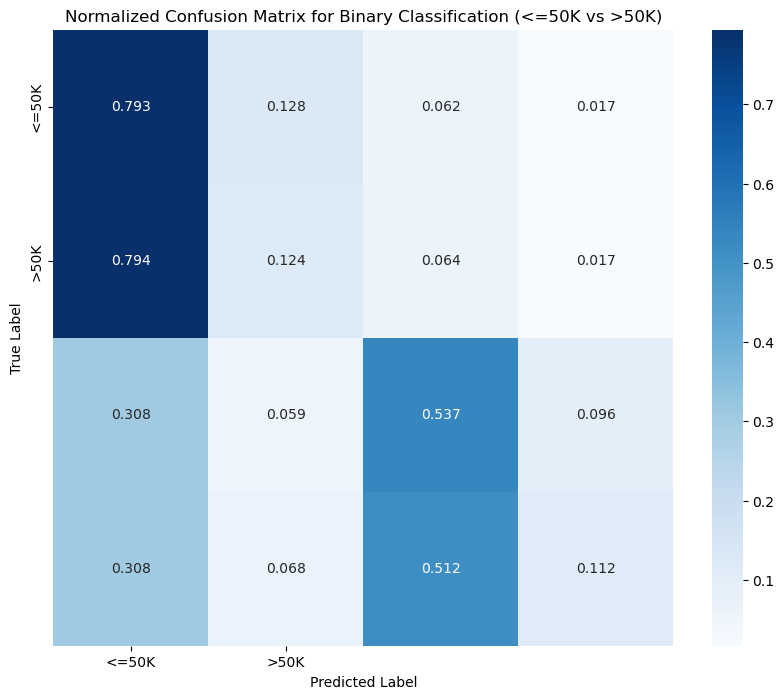

In [44]:
#Plot the normalized confusion matrix 
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.3f', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix for Binary Classification (<=50K vs >50K)')
plt.show()